In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np
import cv2
from PIL import Image
import os, json, cv2, random
from google.colab.patches import cv2_imshow

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.2/235.7 GB disk)


In [ ]:
model = YOLO("yolo11n.pt")
model_world = YOLO("yolov8m-world.pt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!mkdir {HOME}/datasets

In [ ]:
model_world.set_classes(["player", "enemy"])
model_world.save("custom_yolo.pt")

requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-p0oe0b_v
  Resolved https://github.com/ultralytics/CLIP.git to commit 092b5fee65f85fc0020920af395b162366d4bc16
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 122.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1382442 sha256=d5feefebd28aa9570d39044e07f839e91d11de6853edbd197a8ee8982076b3aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-qh7tunl7/wheels/04/89/1d/c5712518ddb082b177c25dd0e1119b6a1c45ea1ab4e7fcd8a6
Successfully built clip

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 59.7MiB/s]


In [ ]:
custom_model = YOLO("custom_yolo.pt")


image 1/1 /content/datasets/catdataset/images/fbc972be-09bd-11f0-a42d-acde48001122.jpg: 384x640 (no detections), 18.9ms
Speed: 2.6ms preprocess, 18.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


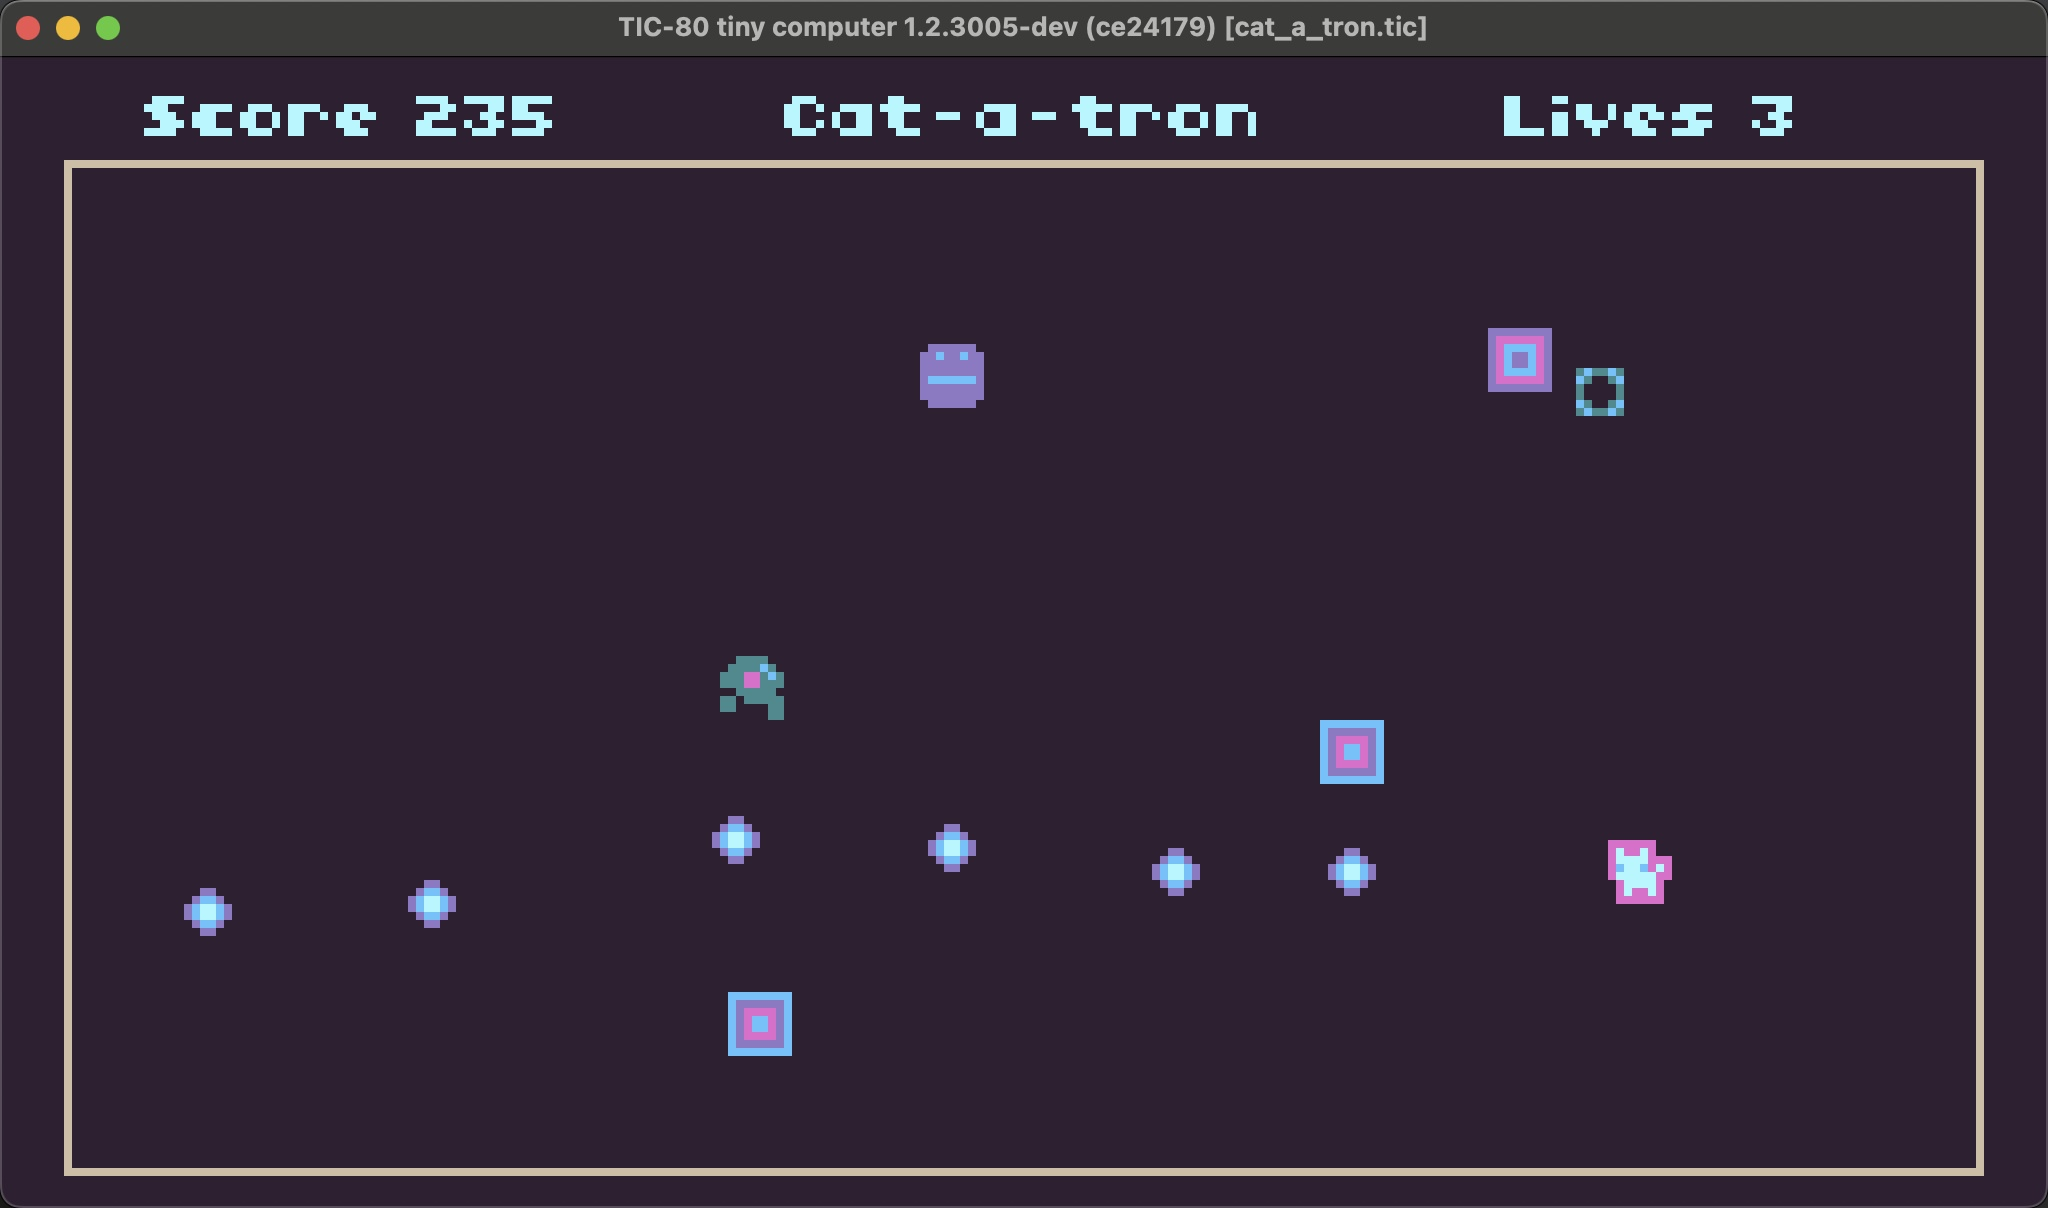

In [ ]:
# Пробуем применить yolo-world
img = os.path.join('datasets', 'catdataset', 'images', 'fbc972be-09bd-11f0-a42d-acde48001122.jpg')
results = model_world.predict(img)

results[0].show()

In [ ]:
# Yolo-world ничего не неходит, к сожалению

In [ ]:
# Обучим нашу модель
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="catdataset_v11.yaml", epochs=100, batch=18, workers=2)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=catdataset_v11.yaml, epochs=100, time=None, patience=100, batch=18, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 114MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/datasets/catdataset/labels... 274 images, 0 backgrounds, 0 corrupt: 100%|██████████| 274/274 [00:00<00:00, 1492.20it/s]

train: New cache created: /content/datasets/catdataset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/catdataset/labels.cache... 274 images, 0 backgrounds, 0 corrupt: 100%|██████████| 274/274 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005625000000000001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.59G      1.685      4.664       1.01         32        640: 100%|██████████| 16/16 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        274       1869          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.62G      1.653      4.066     0.9805         43        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        274       1869     0.0391      0.274     0.0503     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.63G      1.627      3.296      0.982         32        640: 100%|██████████| 16/16 [00:02<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all        274       1869     0.0187      0.581      0.151     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.65G       1.63      2.562     0.9924         44        640: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869     0.0194      0.767      0.295      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.77G      1.595      2.078     0.9849         33        640: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.54it/s]

                   all        274       1869       0.88       0.12      0.429      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.79G      1.565      1.732     0.9714         51        640: 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        274       1869      0.946       0.19      0.603      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.79G       1.55      1.567     0.9711         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        274       1869      0.843      0.271      0.694       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.79G      1.549      1.466     0.9813         23        640: 100%|██████████| 16/16 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        274       1869      0.812      0.462      0.689      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.79G      1.585       1.37     0.9925         36        640: 100%|██████████| 16/16 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.48it/s]

                   all        274       1869      0.731      0.716        0.8      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.79G      1.553      1.308     0.9668         49        640: 100%|██████████| 16/16 [00:02<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        274       1869      0.759      0.774      0.837      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.79G       1.51      1.274     0.9635         48        640: 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        274       1869      0.822      0.823      0.873      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.79G      1.486      1.253     0.9511         58        640: 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        274       1869      0.872      0.846       0.89      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.79G      1.438      1.195     0.9419         45        640: 100%|██████████| 16/16 [00:02<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        274       1869      0.845      0.895      0.893      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.79G      1.471      1.147     0.9536         39        640: 100%|██████████| 16/16 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.53it/s]

                   all        274       1869      0.858      0.932      0.907      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.79G      1.429      1.123     0.9528         37        640: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        274       1869      0.857      0.914        0.9      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.79G       1.41      1.094     0.9397         46        640: 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]

                   all        274       1869      0.816      0.892      0.909      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.79G      1.427      1.052     0.9475         53        640: 100%|██████████| 16/16 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.54it/s]

                   all        274       1869      0.866      0.932      0.924      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.79G      1.394      1.048       0.96         44        640: 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        274       1869      0.802      0.916       0.92       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.8G      1.447       1.04     0.9591         69        640: 100%|██████████| 16/16 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        274       1869       0.87       0.96       0.94      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.8G      1.425      1.034     0.9488         53        640: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        274       1869      0.882      0.917      0.946      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.82G      1.368     0.9626     0.9308         52        640: 100%|██████████| 16/16 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]

                   all        274       1869      0.876      0.951      0.949      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.82G      1.375     0.9838     0.9446         54        640: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all        274       1869      0.912      0.935      0.944      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.83G      1.388      1.016     0.9334         31        640: 100%|██████████| 16/16 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all        274       1869       0.91      0.937      0.945       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.96G      1.366     0.9736     0.9414         34        640: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.54it/s]

                   all        274       1869      0.915      0.932      0.959      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.96G      1.399      0.934     0.9432         45        640: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        274       1869       0.94      0.939      0.966      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.09G      1.367      0.954      0.937         20        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.935      0.923      0.967      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.09G      1.359     0.9405     0.9146         84        640: 100%|██████████| 16/16 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        274       1869      0.882      0.945      0.947      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.09G      1.358     0.9277     0.9328         59        640: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        274       1869      0.905      0.936      0.956      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.09G      1.324     0.8913     0.9283         48        640: 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869      0.926      0.943      0.966      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.09G      1.354     0.8877     0.9398         43        640: 100%|██████████| 16/16 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        274       1869      0.944      0.921      0.975      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.09G      1.326     0.8718     0.9318         25        640: 100%|██████████| 16/16 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.78it/s]

                   all        274       1869       0.95      0.952      0.974      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.09G      1.335     0.8857     0.9347         28        640: 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        274       1869      0.954      0.951      0.974      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.09G      1.342     0.8685     0.9258         21        640: 100%|██████████| 16/16 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]

                   all        274       1869      0.955      0.956      0.978      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.09G      1.325     0.8684     0.9233         47        640: 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        274       1869      0.964      0.948      0.979      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.09G      1.324     0.8522     0.9174         54        640: 100%|██████████| 16/16 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.946      0.978      0.981      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.09G      1.332      0.846     0.9215         51        640: 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.941      0.977       0.98      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.09G      1.307     0.8233     0.9142        101        640: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        274       1869      0.908      0.978      0.974      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.09G      1.299      0.844     0.9173         71        640: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869      0.966      0.966      0.981      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.09G      1.303     0.8167     0.9197         47        640: 100%|██████████| 16/16 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]

                   all        274       1869      0.951      0.976       0.98      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.09G      1.315     0.8247     0.9201         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]

                   all        274       1869      0.957      0.975      0.983       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.09G      1.297     0.8151     0.9184         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        274       1869      0.954      0.976      0.983      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.09G      1.295     0.7986     0.9272         76        640: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.79it/s]

                   all        274       1869      0.968      0.964      0.981      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.09G       1.28     0.8131     0.9096         62        640: 100%|██████████| 16/16 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        274       1869      0.962      0.971      0.985      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.09G      1.259     0.7718     0.9118         47        640: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869      0.948      0.977      0.986       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.09G      1.267     0.7782     0.9159         31        640: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869      0.967      0.973      0.984      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.09G      1.291     0.7839     0.9232         23        640: 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        274       1869       0.95      0.963      0.985      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.09G      1.282     0.7844      0.917         43        640: 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        274       1869      0.963      0.975      0.985      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.09G      1.263     0.7745     0.9177         45        640: 100%|██████████| 16/16 [00:02<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        274       1869      0.968      0.972      0.987      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.09G      1.271     0.7697     0.9112         38        640: 100%|██████████| 16/16 [00:02<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        274       1869      0.971      0.968      0.986      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.09G       1.29     0.7871     0.9163         62        640: 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.80it/s]

                   all        274       1869       0.97      0.968      0.983      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.09G      1.255      0.769     0.9217         41        640: 100%|██████████| 16/16 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.79it/s]

                   all        274       1869      0.963      0.979      0.988       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.09G       1.29     0.7608     0.9214         39        640: 100%|██████████| 16/16 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        274       1869      0.973      0.973      0.986      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.09G      1.231     0.7488     0.9099         85        640: 100%|██████████| 16/16 [00:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        274       1869      0.965      0.976      0.986      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.09G      1.247     0.7534     0.9141         37        640: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        274       1869       0.97      0.978      0.987      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.09G       1.24     0.7413     0.9087         43        640: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        274       1869      0.975       0.97      0.987      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.09G      1.238     0.7713     0.9177         14        640: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        274       1869      0.969      0.977      0.986      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.09G      1.214     0.7276     0.9131         39        640: 100%|██████████| 16/16 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]

                   all        274       1869      0.973      0.976      0.987      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.09G      1.216     0.7269     0.9002         61        640: 100%|██████████| 16/16 [00:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.78it/s]

                   all        274       1869       0.98      0.969      0.988      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.09G      1.231     0.7419     0.9066         55        640: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        274       1869      0.963      0.978      0.986      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.09G      1.207     0.7217     0.9043         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        274       1869      0.974      0.969      0.988      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.24G      1.205     0.7005     0.9083         33        640: 100%|██████████| 16/16 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]

                   all        274       1869      0.971      0.972      0.987      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.24G      1.213     0.7111     0.9089         51        640: 100%|██████████| 16/16 [00:02<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        274       1869      0.984      0.964      0.989      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.24G      1.227     0.7078     0.9177         17        640: 100%|██████████| 16/16 [00:02<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        274       1869       0.98      0.958      0.986       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.24G      1.204     0.7114     0.9086         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        274       1869       0.96      0.975      0.989      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.24G      1.199     0.7056     0.9105         72        640: 100%|██████████| 16/16 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.79it/s]

                   all        274       1869      0.976      0.976      0.989      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.24G      1.183     0.7001     0.8973         26        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.51it/s]

                   all        274       1869      0.973      0.977      0.989      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.24G      1.201     0.6933     0.9026         21        640: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        274       1869      0.973      0.976      0.989      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.24G      1.187     0.6952     0.9012         84        640: 100%|██████████| 16/16 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]

                   all        274       1869      0.977      0.975      0.989      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.24G      1.201     0.6871     0.8947         50        640: 100%|██████████| 16/16 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        274       1869      0.973      0.979      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.24G      1.163     0.6911     0.8939         70        640: 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all        274       1869      0.976      0.978      0.989      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.24G      1.168     0.6748     0.8993         43        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        274       1869      0.977      0.978      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.24G      1.183     0.6884     0.9012         36        640: 100%|██████████| 16/16 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]

                   all        274       1869      0.974       0.98      0.991      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.24G      1.162     0.6932     0.8934         45        640: 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        274       1869      0.975      0.978       0.99      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.24G      1.176     0.6786     0.9036         79        640: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]

                   all        274       1869       0.98      0.978      0.991      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.24G       1.19     0.6836      0.909         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]

                   all        274       1869      0.984      0.978       0.99      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.24G      1.175     0.6817     0.9024         67        640: 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        274       1869      0.979      0.979       0.99      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.24G      1.165     0.6665     0.9054         28        640: 100%|██████████| 16/16 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        274       1869      0.978      0.979       0.99      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.24G      1.174     0.6752     0.8947         66        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]

                   all        274       1869      0.981       0.98       0.99      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.24G      1.189     0.6781     0.9009         38        640: 100%|██████████| 16/16 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        274       1869      0.974       0.98       0.99      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.24G      1.178     0.6812     0.9069         29        640: 100%|██████████| 16/16 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.979      0.976       0.99      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.24G      1.163     0.6723     0.9033         69        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.82it/s]

                   all        274       1869      0.976      0.983      0.991      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.24G      1.154     0.6641     0.8911         40        640: 100%|██████████| 16/16 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.981       0.98      0.991      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.24G      1.127     0.6453     0.8917         23        640: 100%|██████████| 16/16 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        274       1869      0.981      0.982      0.991      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.24G      1.143     0.6406     0.8976         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.87it/s]

                   all        274       1869      0.981       0.98      0.991      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.24G      1.166     0.6545     0.9101         28        640: 100%|██████████| 16/16 [00:02<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        274       1869       0.98      0.979      0.991      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.24G      1.153     0.6538     0.8924         51        640: 100%|██████████| 16/16 [00:02<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.78it/s]

                   all        274       1869      0.984      0.976      0.991      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.24G      1.141     0.6366     0.8892         62        640: 100%|██████████| 16/16 [00:02<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        274       1869       0.98       0.98       0.99      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.24G      1.123     0.6414      0.894         33        640: 100%|██████████| 16/16 [00:02<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.81it/s]

                   all        274       1869      0.982      0.978      0.991      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.24G      1.105     0.6362     0.8853         92        640: 100%|██████████| 16/16 [00:02<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        274       1869      0.981      0.983      0.991      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.24G       1.12     0.6374     0.8885         41        640: 100%|██████████| 16/16 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        274       1869      0.976      0.984      0.991      0.727


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.24G       1.14     0.7024     0.9041         22        640: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.81it/s]

                   all        274       1869      0.978      0.981       0.99      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.24G      1.098     0.6775     0.8898         30        640: 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        274       1869      0.977      0.981       0.99      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.24G      1.073     0.6535     0.8911         29        640: 100%|██████████| 16/16 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]

                   all        274       1869      0.977      0.979      0.989      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.24G      1.082     0.6567     0.8814         44        640: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        274       1869      0.979       0.98      0.989      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.24G      1.084     0.6539     0.8927         24        640: 100%|██████████| 16/16 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        274       1869      0.981      0.983       0.99      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.24G      1.055     0.6364      0.894         30        640: 100%|██████████| 16/16 [00:02<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        274       1869      0.981      0.985       0.99       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.24G      1.053     0.6371     0.8994         31        640: 100%|██████████| 16/16 [00:01<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]

                   all        274       1869      0.981      0.983       0.99      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.24G       1.06     0.6421       0.89         21        640: 100%|██████████| 16/16 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        274       1869      0.981      0.984       0.99      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.24G      1.071     0.6484     0.8838         20        640: 100%|██████████| 16/16 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        274       1869       0.98      0.982      0.991       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.24G      1.047     0.6392     0.8881         35        640: 100%|██████████| 16/16 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]

                   all        274       1869       0.98      0.983      0.991      0.731



100 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]


                   all        274       1869      0.981      0.981      0.991       0.73
               0_Bonus        152        273      0.996          1      0.995      0.743
           1_Game_Over         15         15      0.974          1      0.995      0.654
          2_Game_Start         10         10      0.961          1      0.995      0.936
          3_Press_Fire          9          9      0.955          1      0.995      0.672
              4_Player        239        240      0.987      0.992      0.994      0.727
        5_Common_Enemy        164        394      0.969      0.977      0.991       0.67
       6_Radiation_Man         80        102       0.96      0.953      0.992      0.699
               7_Organ         71         71      0.979      0.986      0.993      0.778
            8_Sentinel        108        135          1      0.997      0.995      0.767
               9_Mouth         60         63      0.994          1      0.995       0.77
              10_Mine

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797be0114350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [ ]:
saved_model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
saved_model.save("kir_best_100.pt")


image 1/1 /content/datasets/catdataset/images/fbc972be-09bd-11f0-a42d-acde48001122.jpg: 384x640 3 0_Bonuss, 1 4_Player, 1 5_Common_Enemy, 1 9_Mouth, 1 10_Miner, 61.2ms
Speed: 2.8ms preprocess, 61.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


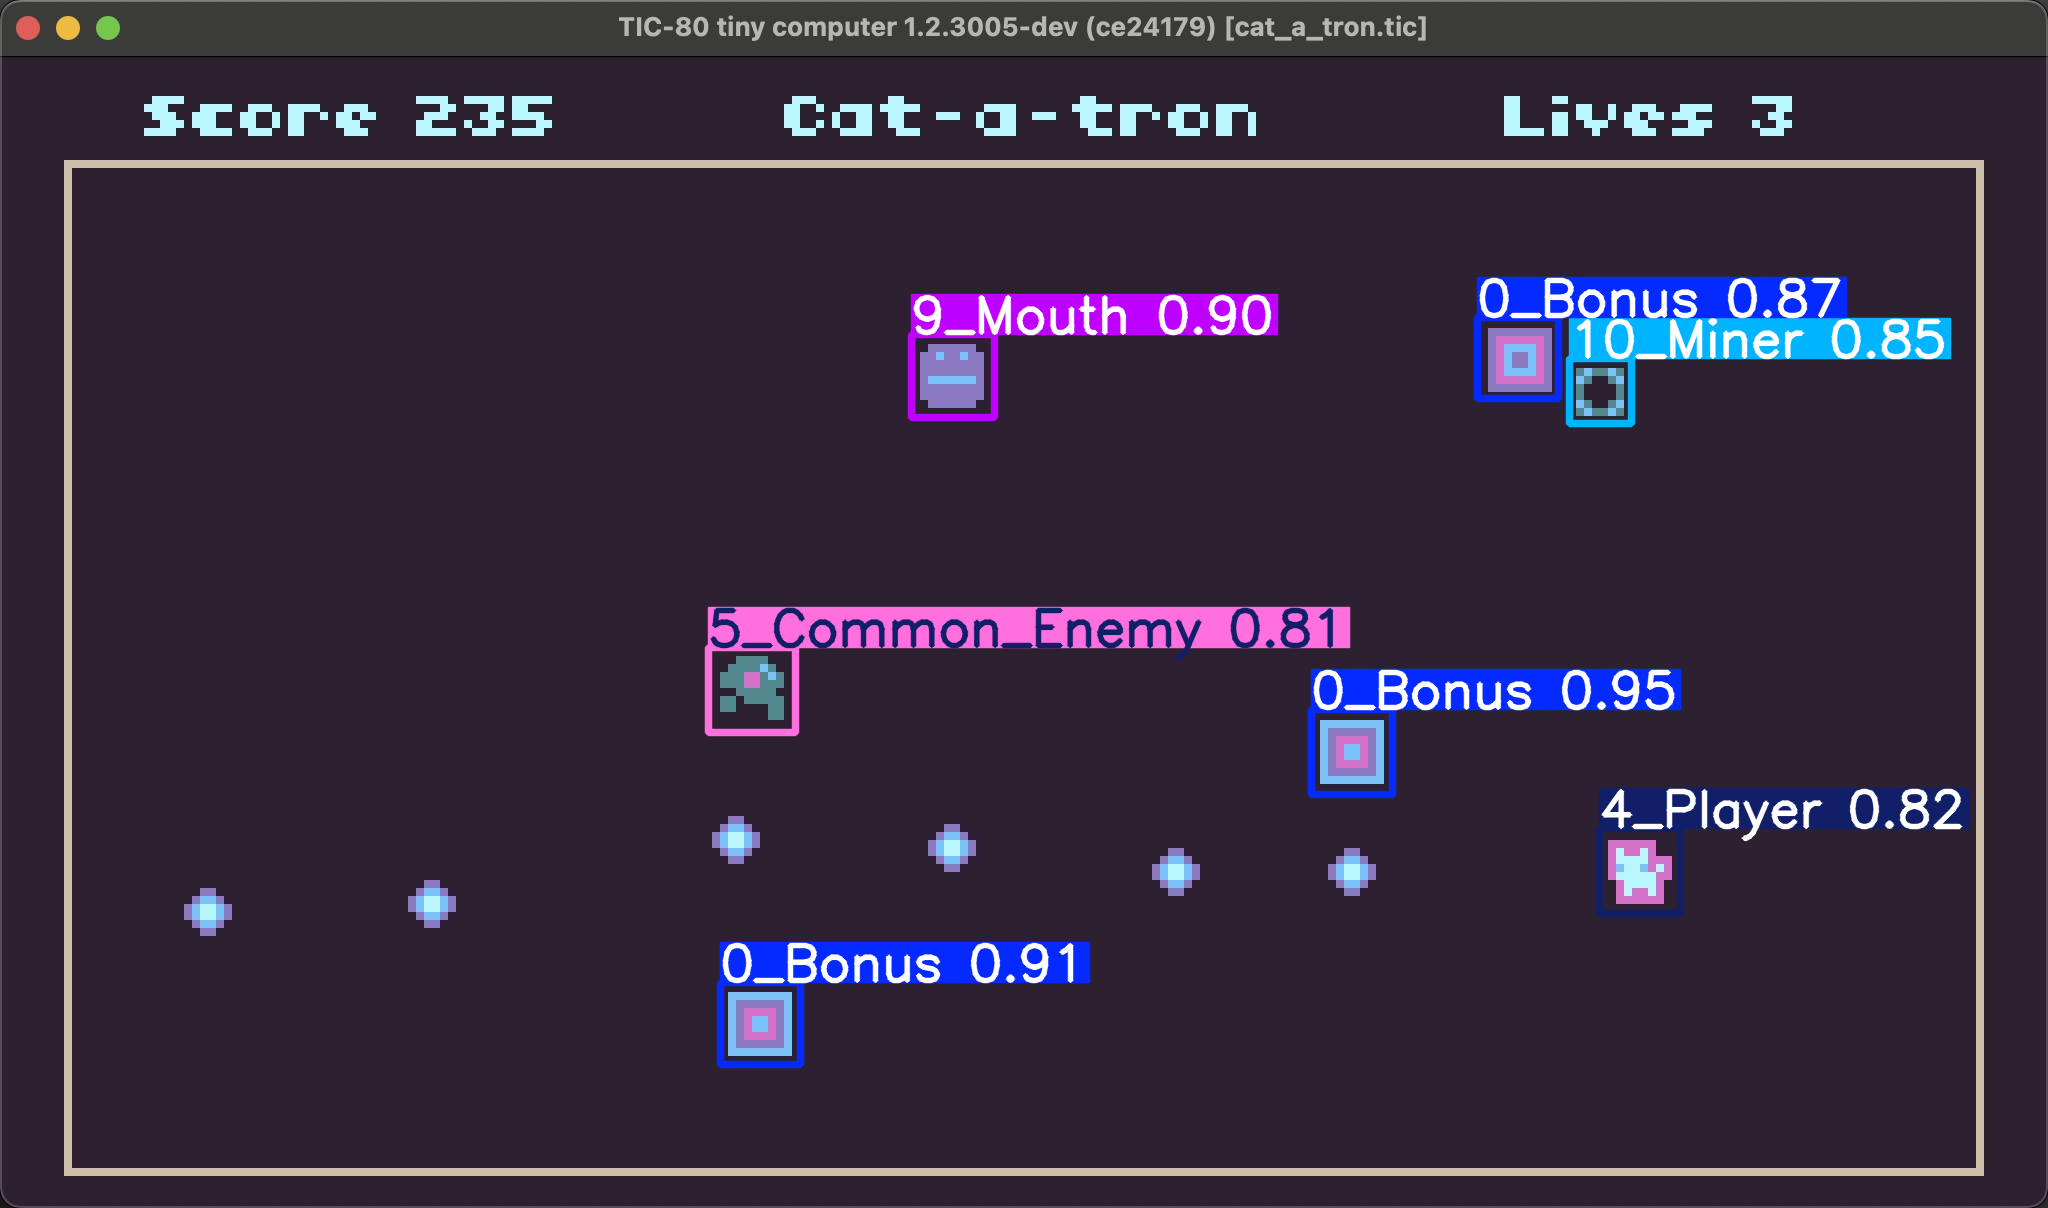

In [ ]:
# Пробуем применить обученную модель
img = os.path.join('datasets', 'catdataset', 'images', 'fbc972be-09bd-11f0-a42d-acde48001122.jpg')
results = saved_model.predict(img)

results[0].show()


image 1/1 /content/datasets/catdataset/images/c283623a-09bd-11f0-a42d-acde48001122.jpg: 384x640 1 2_Game_Start, 1 4_Player, 20.9ms
Speed: 5.0ms preprocess, 20.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


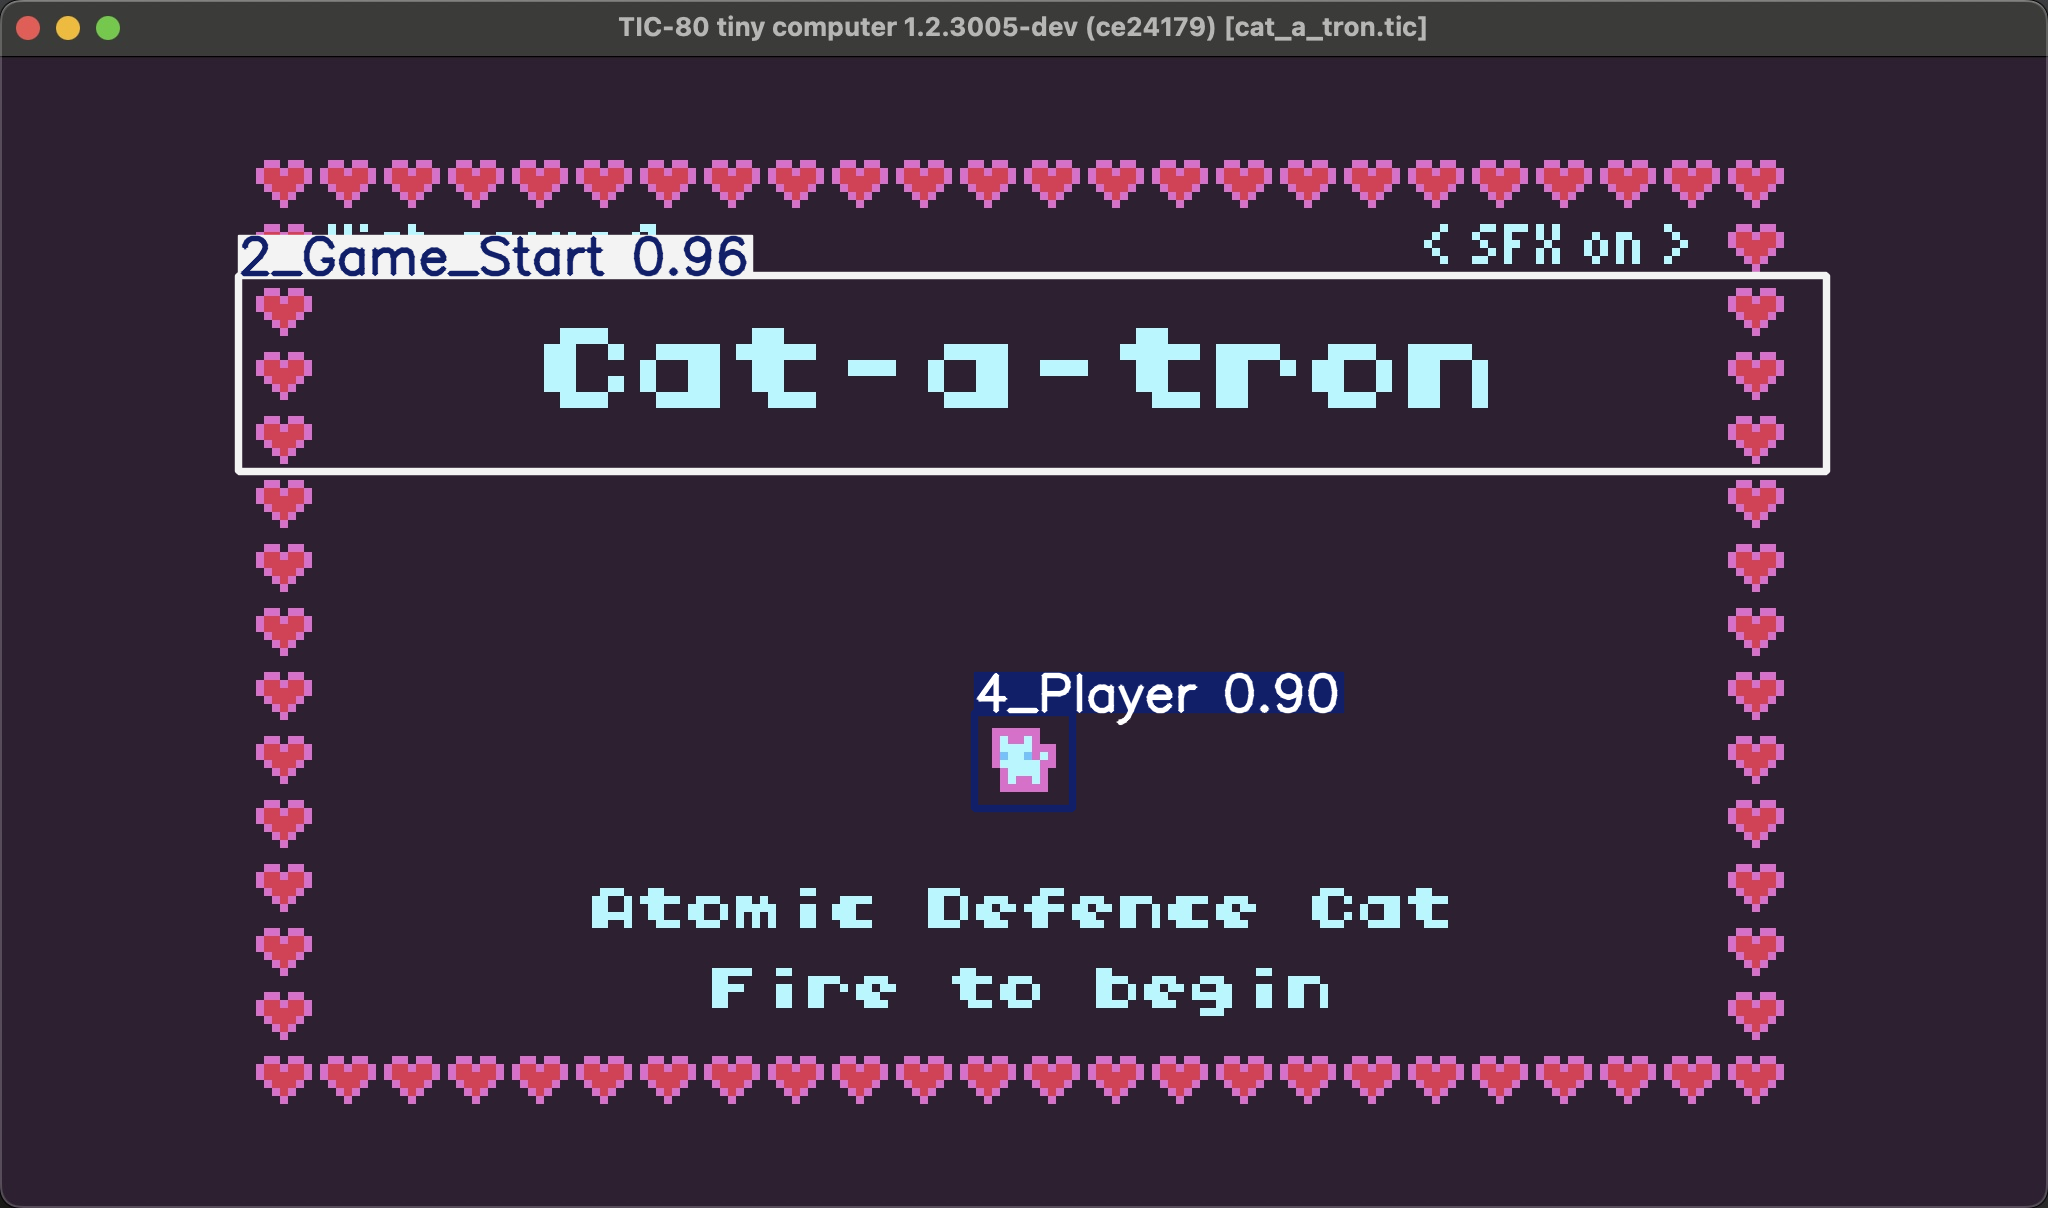

In [ ]:
# Пробуем применить обученную модель 2
img = os.path.join('datasets', 'catdataset', 'images', 'c283623a-09bd-11f0-a42d-acde48001122.jpg')
results = saved_model(img)

results[0].show()




image 1/1 /content/datasets/catdataset/images/3632dd58-09c0-11f0-b51c-acde48001122.jpg: 384x640 2 0_Bonuss, 1 4_Player, 2 5_Common_Enemys, 1 6_Radiation_Man, 1 8_Sentinel, 1 10_Miner, 1 11_Tank_Purple, 3 13_Bullets, 12.9ms
Speed: 3.5ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


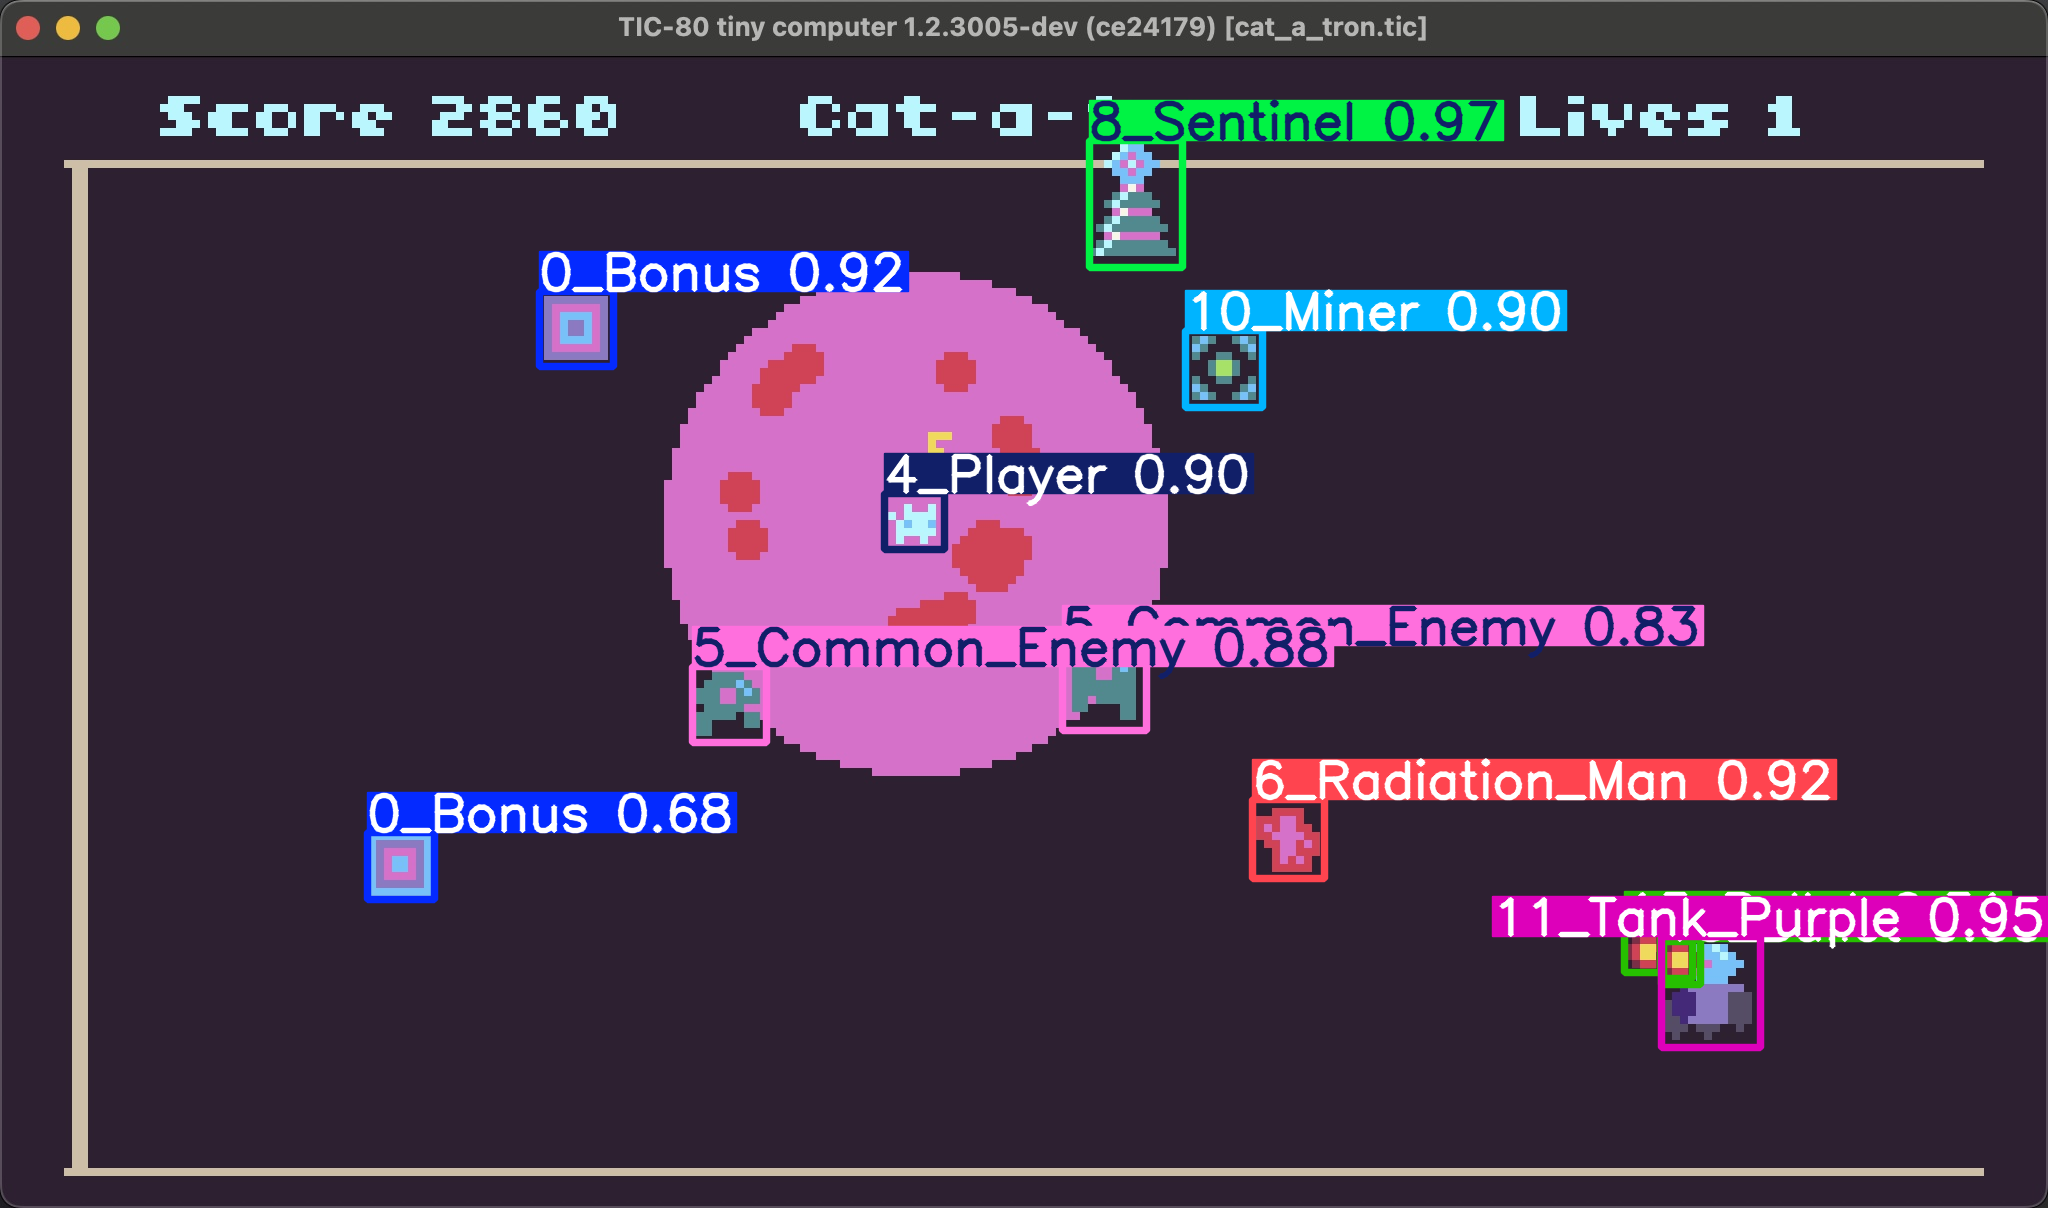

In [ ]:
# Пробуем применить обученную модель 3
img = os.path.join('datasets', 'catdataset', 'images', '3632dd58-09c0-11f0-b51c-acde48001122.jpg')
results = saved_model(img)

results[0].show()


image 1/1 /content/datasets/catdataset/images/c76e11da-09bf-11f0-b51c-acde48001122.jpg: 384x640 1 3_Press_Fire, 12.7ms
Speed: 4.1ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


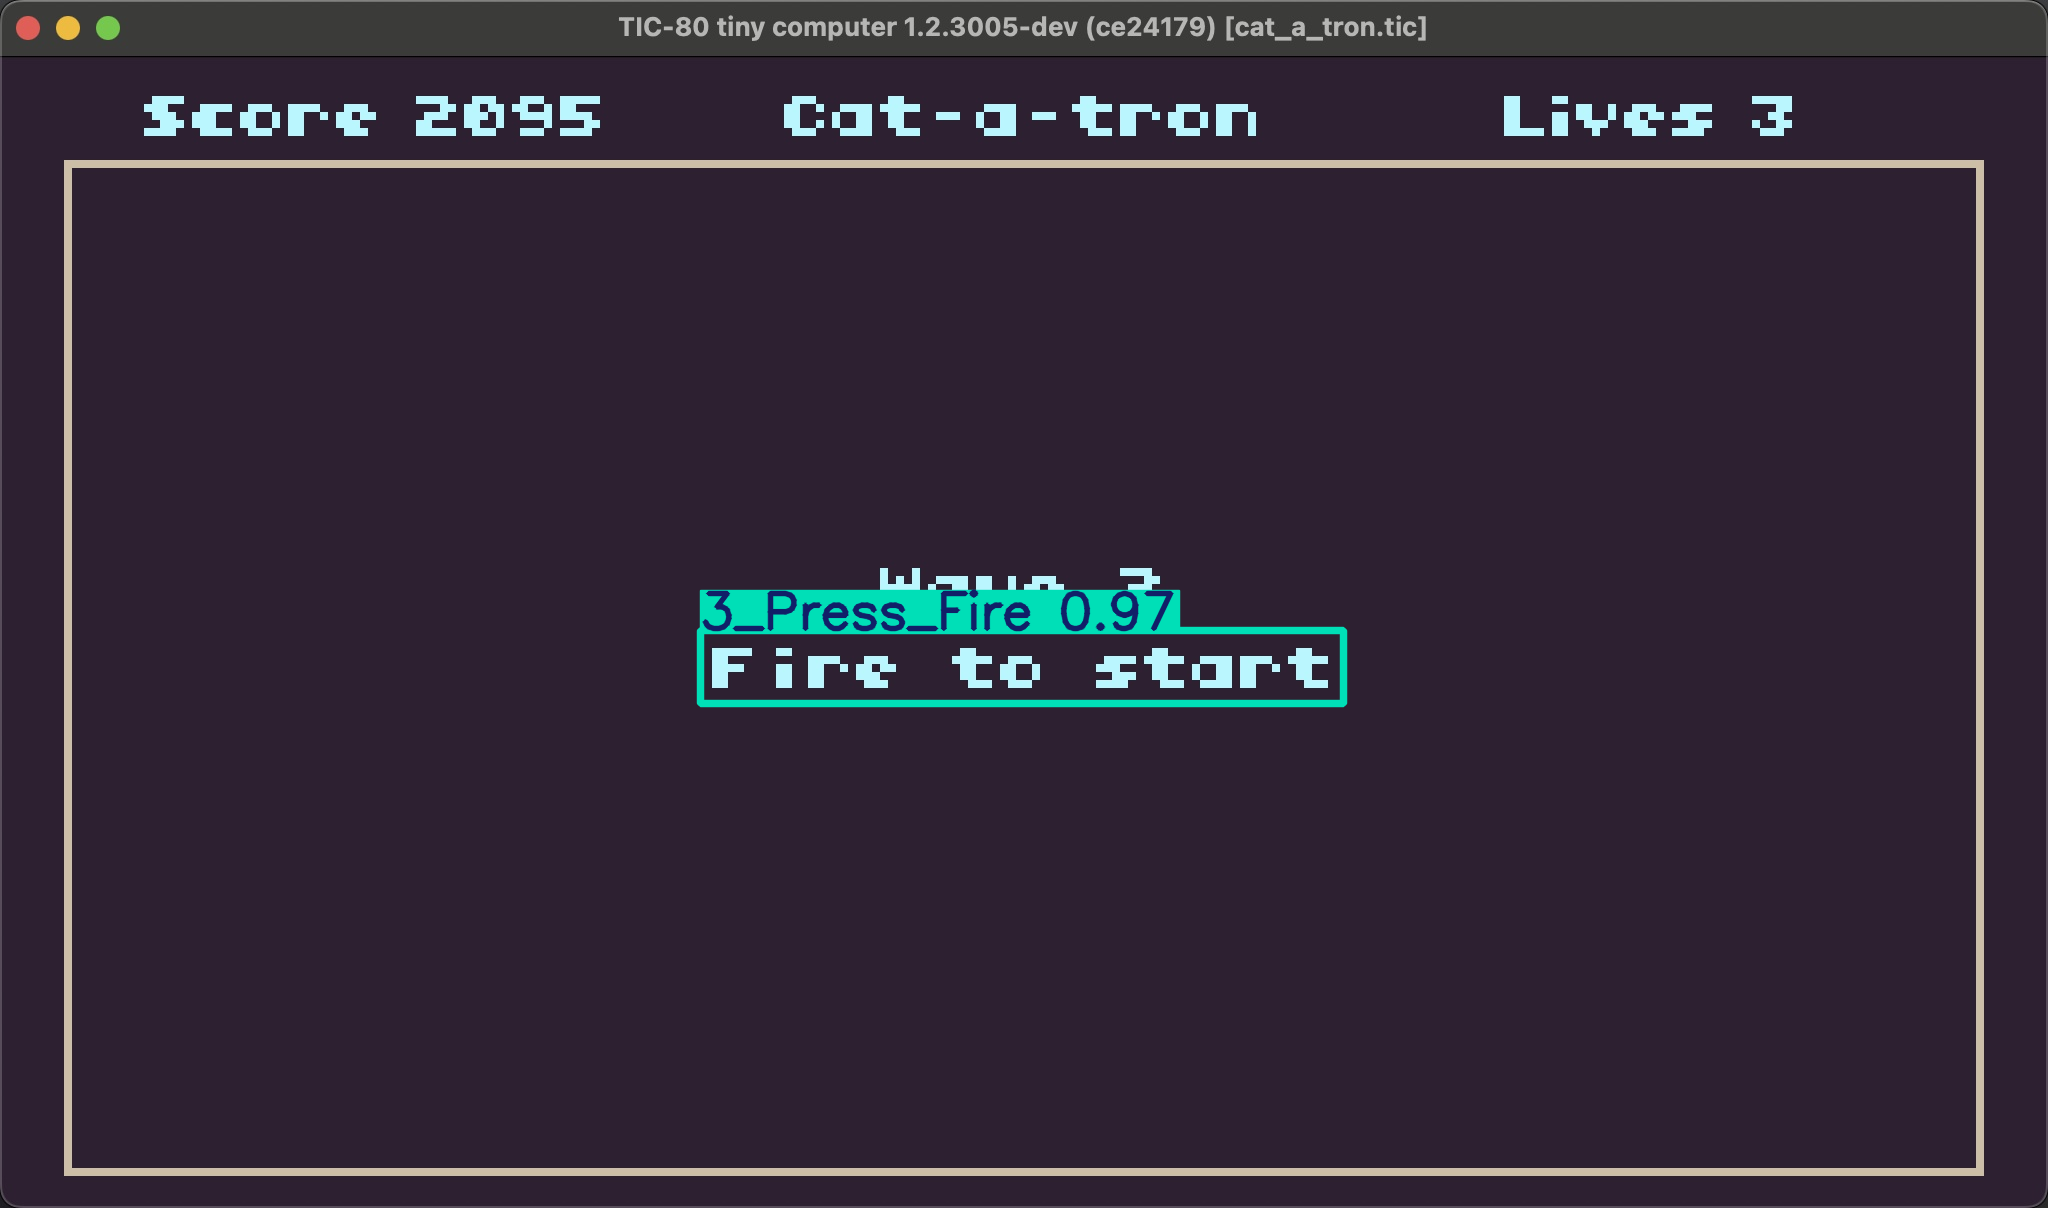

In [ ]:
# Пробуем применить обученную модель 4
img = os.path.join('datasets', 'catdataset', 'images', 'c76e11da-09bf-11f0-b51c-acde48001122.jpg')
results = saved_model(img)

results[0].show()


image 1/1 /content/datasets/catdataset/images/4dc3bba2-09cc-11f0-9eef-acde48001122.jpg: 384x640 1 0_Bonus, 1 4_Player, 5 5_Common_Enemys, 4 6_Radiation_Mans, 1 7_Organ, 2 8_Sentinels, 1 9_Mouth, 2 10_Miners, 1 11_Tank_Purple, 1 12_Tank_Green, 7 13_Bullets, 13.0ms
Speed: 2.5ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


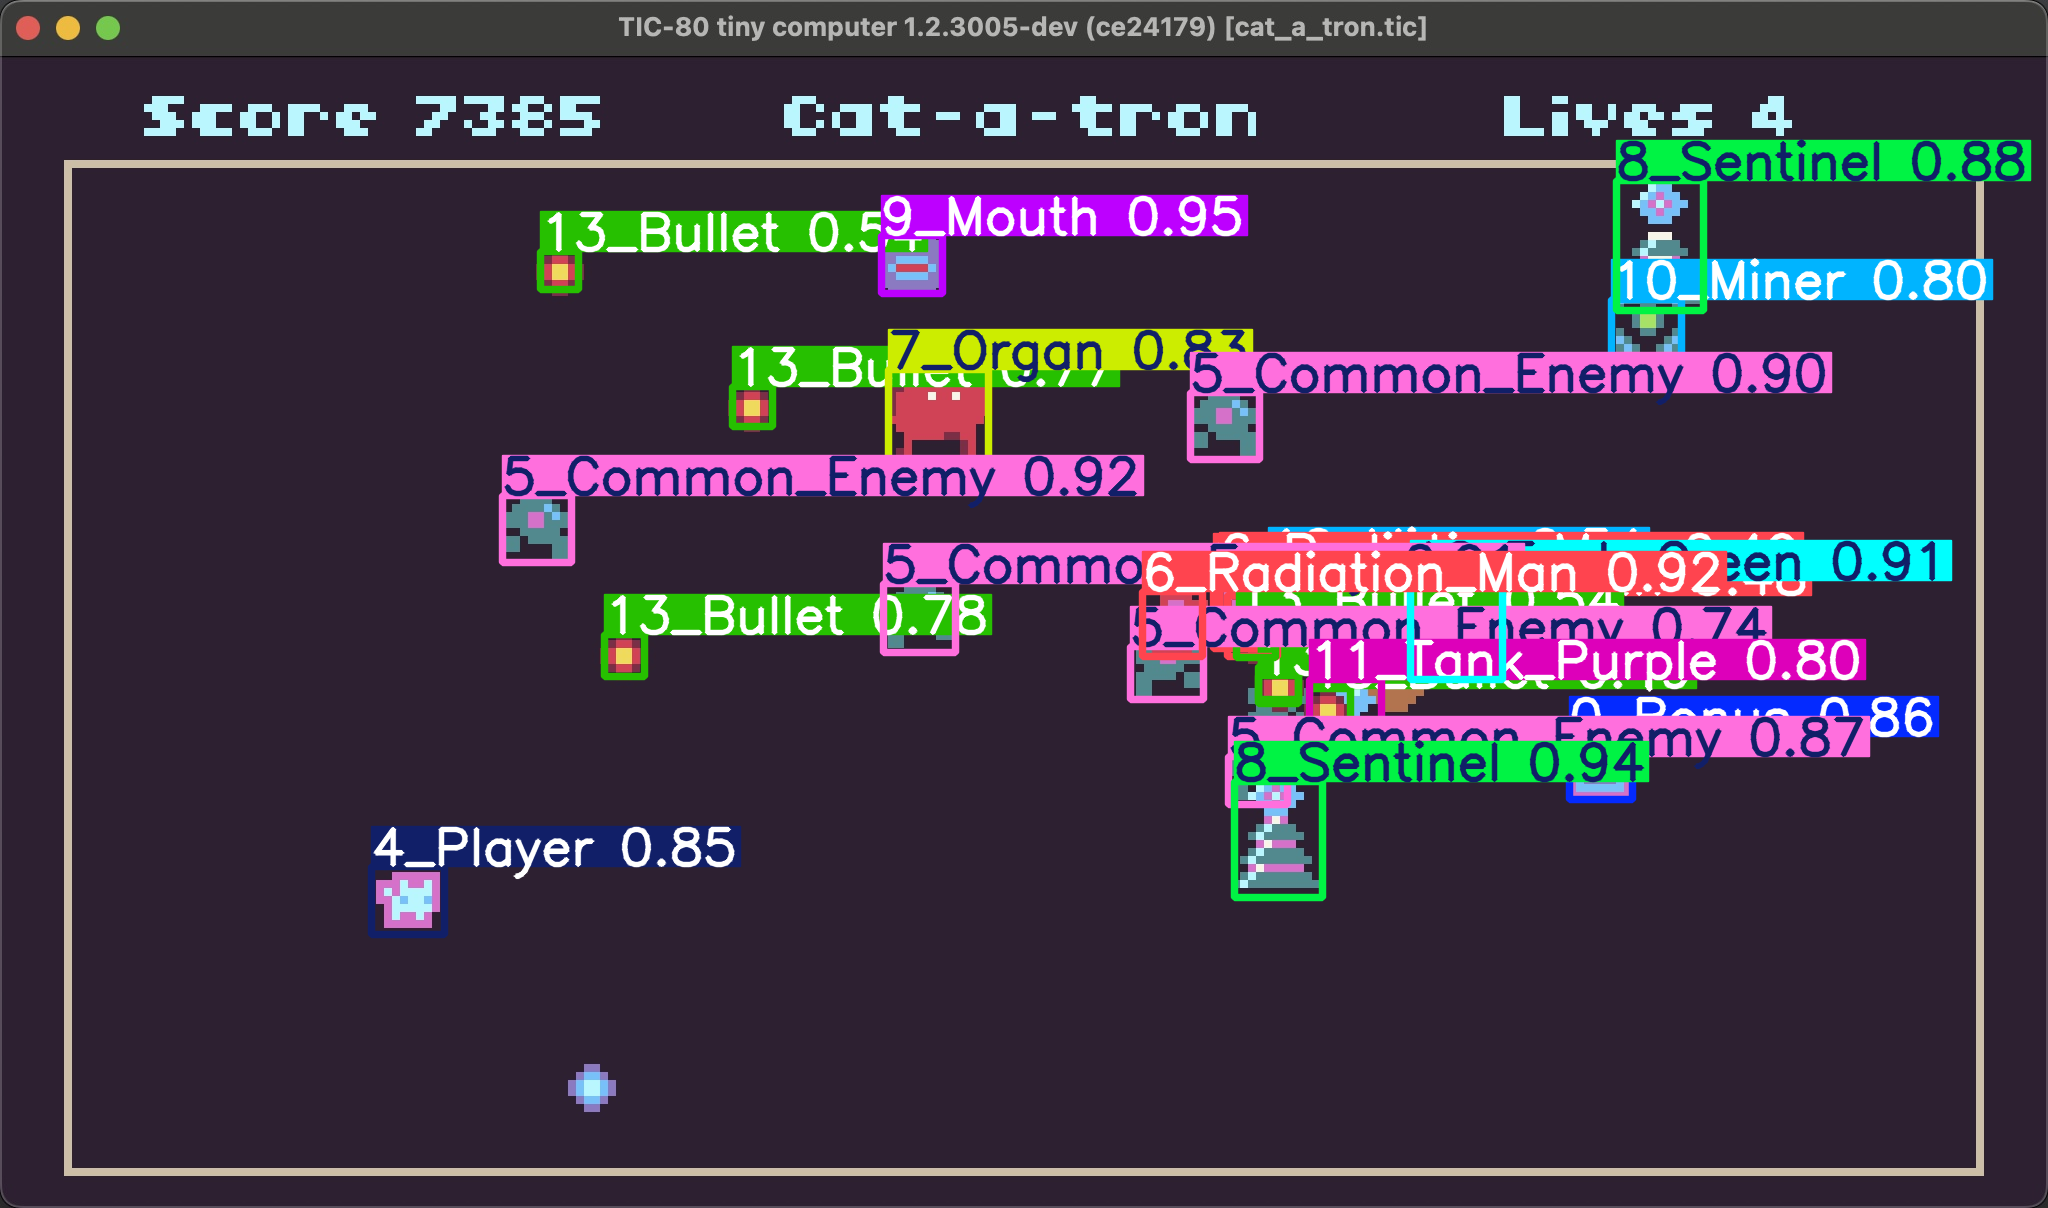

In [ ]:
# Пробуем применить обученную модель 5
img = os.path.join('datasets', 'catdataset', 'images', '4dc3bba2-09cc-11f0-9eef-acde48001122.jpg')
results = saved_model(img)

results[0].show()

In [ ]:
#Вроде норм. Но напрягает 18 ms на обработку. Давайте сразу экспортнём куда-нибудь потестить

In [ ]:
saved_model.export(format='openvino')

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0,!=2025.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 204.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.1s, installed 1 package: ['openvino>=2024.0.0,!=2025.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 10.9s, saved as 'runs/detect/train/weights/best_openvino_model/' (10.3 MB)

Export complete (12.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_openvino_model imgsz=640  
Validate:        yolo val task=detect model=

'runs/detect/train/weights/best_openvino_model'

In [ ]:
saved_model.export(format='onnx')

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 325.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 288.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 340.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 212.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 276.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.2s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: sli

'runs/detect/train/weights/best.onnx'

In [ ]:
# Забавно конечно, что она конвертит не из загруженной модели, а из файлов в runs/detect/train/weights
# А вдруг там уже другое....

# Классификация

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model

# Train the model
results = model.train(data="/content/datasets/catclassificationset", epochs=100)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/datasets/catclassificationset, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /content/datasets/catclassificationset/train... 615 images, 0 corrupt: 100%|██████████| 615/615 [00:00<?, ?it/s]
val: Scanning /content/datasets/catclassificationset/test... 129 images, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      2.06G      1.821          7        224: 100%|██████████| 39/39 [00:02<00:00, 13.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.02it/s]

                   all      0.364          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      2.06G      1.544          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.58it/s]


                   all      0.442          1

      Epoch    GPU_mem       loss  Instances       Size


      3/100      2.06G       1.45          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.33it/s]

                   all      0.333          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      2.06G      1.416          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.72it/s]


                   all      0.488          1

      Epoch    GPU_mem       loss  Instances       Size


      5/100      2.06G      1.454          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.83it/s]


                   all      0.442          1

      Epoch    GPU_mem       loss  Instances       Size


      6/100      2.06G      1.385          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.73it/s]

                   all      0.457          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      2.06G      1.405          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 47.17it/s]


                   all      0.457          1

      Epoch    GPU_mem       loss  Instances       Size


      8/100      2.06G      1.366          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 45.00it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      2.06G      1.314          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.82it/s]

                   all      0.496          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      2.06G      1.317          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 55.83it/s]

                   all       0.55          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      2.06G      1.263          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.01it/s]

                   all       0.55          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      2.06G      1.331          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.72it/s]

                   all      0.504          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      2.06G      1.302          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 45.73it/s]

                   all      0.589          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      2.06G      1.272          7        224: 100%|██████████| 39/39 [00:04<00:00,  9.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.42it/s]

                   all      0.566          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      2.06G       1.22          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.47it/s]

                   all      0.612          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      2.06G      1.218          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.15it/s]


                   all      0.651          1

      Epoch    GPU_mem       loss  Instances       Size


     17/100      2.06G       1.19          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 47.48it/s]


                   all      0.636          1

      Epoch    GPU_mem       loss  Instances       Size


     18/100      2.06G      1.138          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.88it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      2.06G      1.096          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.16it/s]

                   all      0.636          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      2.06G      1.095          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.52it/s]


                   all      0.659          1

      Epoch    GPU_mem       loss  Instances       Size


     21/100      2.06G      1.098          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 63.48it/s]


                   all       0.62          1

      Epoch    GPU_mem       loss  Instances       Size


     22/100      2.06G      1.073          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.36it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.06G       1.06          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 30.55it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.06G      1.032          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 51.72it/s]

                   all      0.705          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.06G      1.013          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.64it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.06G      1.024          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.46it/s]


                   all      0.721          1

      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.06G     0.9333          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.32it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.06G     0.9816          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.23it/s]

                   all       0.76          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.06G     0.9461          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 45.89it/s]

                   all      0.721          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.06G     0.9305          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.70it/s]


                   all       0.76          1

      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.06G     0.8629          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 46.60it/s]


                   all      0.822          1

      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.06G     0.8905          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.13it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.06G     0.8685          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 26.31it/s]


                   all      0.806          1

      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.06G     0.8456          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.39it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.06G     0.8101          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.97it/s]


                   all      0.891          1

      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.06G     0.8709          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 42.82it/s]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.06G     0.8489          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.35it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.06G     0.8337          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.51it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.06G     0.7645          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 40.04it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.06G     0.8189          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.71it/s]


                   all       0.93          1

      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.06G     0.7208          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.50it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.06G     0.7704          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.26it/s]


                   all      0.899          1

      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.06G     0.7264          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.07it/s]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.06G     0.7483          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 34.33it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.06G     0.6733          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 44.21it/s]


                   all      0.922          1

      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.06G     0.6741          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.19it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.06G     0.6308          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 43.19it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.06G     0.6845          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.35it/s]


                   all      0.946          1

      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.06G     0.6189          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.70it/s]


                   all      0.961          1

      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.06G     0.6265          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 63.77it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.06G       0.64          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.05it/s]


                   all      0.938          1

      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.06G     0.5868          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.70it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.06G      0.658          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.90it/s]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.06G     0.6213          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.55it/s]


                   all      0.938          1

      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.06G     0.6093          7        224: 100%|██████████| 39/39 [00:03<00:00,  9.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 48.31it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.06G     0.5663          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.44it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.06G     0.4902          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.34it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.06G     0.5368          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.17it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.06G      0.571          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.60it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.06G     0.5359          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 63.03it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.06G     0.5506          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 36.90it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      2.06G     0.4884          7        224: 100%|██████████| 39/39 [00:03<00:00,  9.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 31.43it/s]


                   all      0.969          1

      Epoch    GPU_mem       loss  Instances       Size


     63/100      2.06G     0.5173          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.00it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.06G     0.4706          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 44.73it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      2.06G     0.4496          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 63.56it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      2.06G     0.4865          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.75it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.06G     0.4864          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.84it/s]


                   all      0.977          1

      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.06G     0.4677          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 33.51it/s]


                   all      0.977          1

      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.06G     0.4693          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.87it/s]


                   all      0.969          1

      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.06G     0.4335          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 70.67it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.06G     0.4796          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.89it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.06G     0.4358          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 34.82it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.06G      0.408          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.43it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.06G     0.4322          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 32.29it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.06G     0.4161          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.12it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.06G     0.3892          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.94it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.06G     0.3978          7        224: 100%|██████████| 39/39 [00:03<00:00, 12.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 51.58it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     78/100      2.06G     0.3771          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.63it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.06G     0.3566          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 55.95it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.06G     0.3899          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.95it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.06G     0.3138          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.54it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.06G     0.3452          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 62.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.06G     0.3402          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 51.21it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.06G     0.3592          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.19it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.06G     0.3586          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.24it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.06G      0.355          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.61it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.06G     0.3065          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 62.43it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.06G     0.2657          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.66it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.06G     0.3456          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.49it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      2.06G     0.3116          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 45.64it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.06G     0.2996          7        224: 100%|██████████| 39/39 [00:03<00:00,  9.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.52it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.06G     0.3094          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.43it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.06G     0.3174          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 61.65it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.06G     0.2835          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.05it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.06G     0.3303          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.29it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.06G     0.3168          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 37.00it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.06G     0.2965          7        224: 100%|██████████| 39/39 [00:03<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 36.28it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.06G     0.2846          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.58it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.06G     0.2738          7        224: 100%|██████████| 39/39 [00:03<00:00, 10.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 33.86it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.06G      0.296          7        224: 100%|██████████| 39/39 [00:03<00:00,  9.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.50it/s]

                   all      0.992          1



100 epochs completed in 0.113 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.2MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n-cls summary (fused): 47 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/catclassificationset/train... found 615 images in 6 classes: ERROR ❌️ requires 7 classes, not 6
val: /content/datasets/catclassificationset/test... found 129 images in 6 classes: ERROR ❌️ requires 7 classes, not 6
test: /content/datasets/catclassificationset/test... found 129 images in 6 classes: ERROR ❌️ requires 7 classes, not 6


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 21.70it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


In [17]:
# Очень клёво конечно, что он скрытые дирректории тоже пытается подхватить....

In [10]:
classify_model = YOLO("/content/runs/classify/train3/weights/best.pt")

In [11]:
classify_model.save("kirkir_classify_model_best.pt")

In [13]:
classify_model.export(format="openvino")

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 47 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs

PyTorch: starting from '/content/runs/classify/train3/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 7) (3.1 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0,!=2025.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 254.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.0s, installed 1 package: ['openvino>=2024.0.0,!=2025.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 6.9s, saved as '/content/runs/classify/train3/weights/best_openvino_model/' (6.0 MB)

Export complete (7.0s)
Results saved to /content/runs/classify/train3/weights
Predict:         yolo predict task=classify mod

'/content/runs/classify/train3/weights/best_openvino_model'


image 1/1 /content/datasets/catclassificationset/test/KEY_UP/e9fd06c2-0ad5-11f0-9a5f-acde48001122.jpg: 224x224 KEY_UP 0.79, KEY_LEFT 0.20, KEY_RIGHT 0.01, KEY_NONE 0.00, KEY_DOWN 0.00, 6.3ms
Speed: 19.0ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


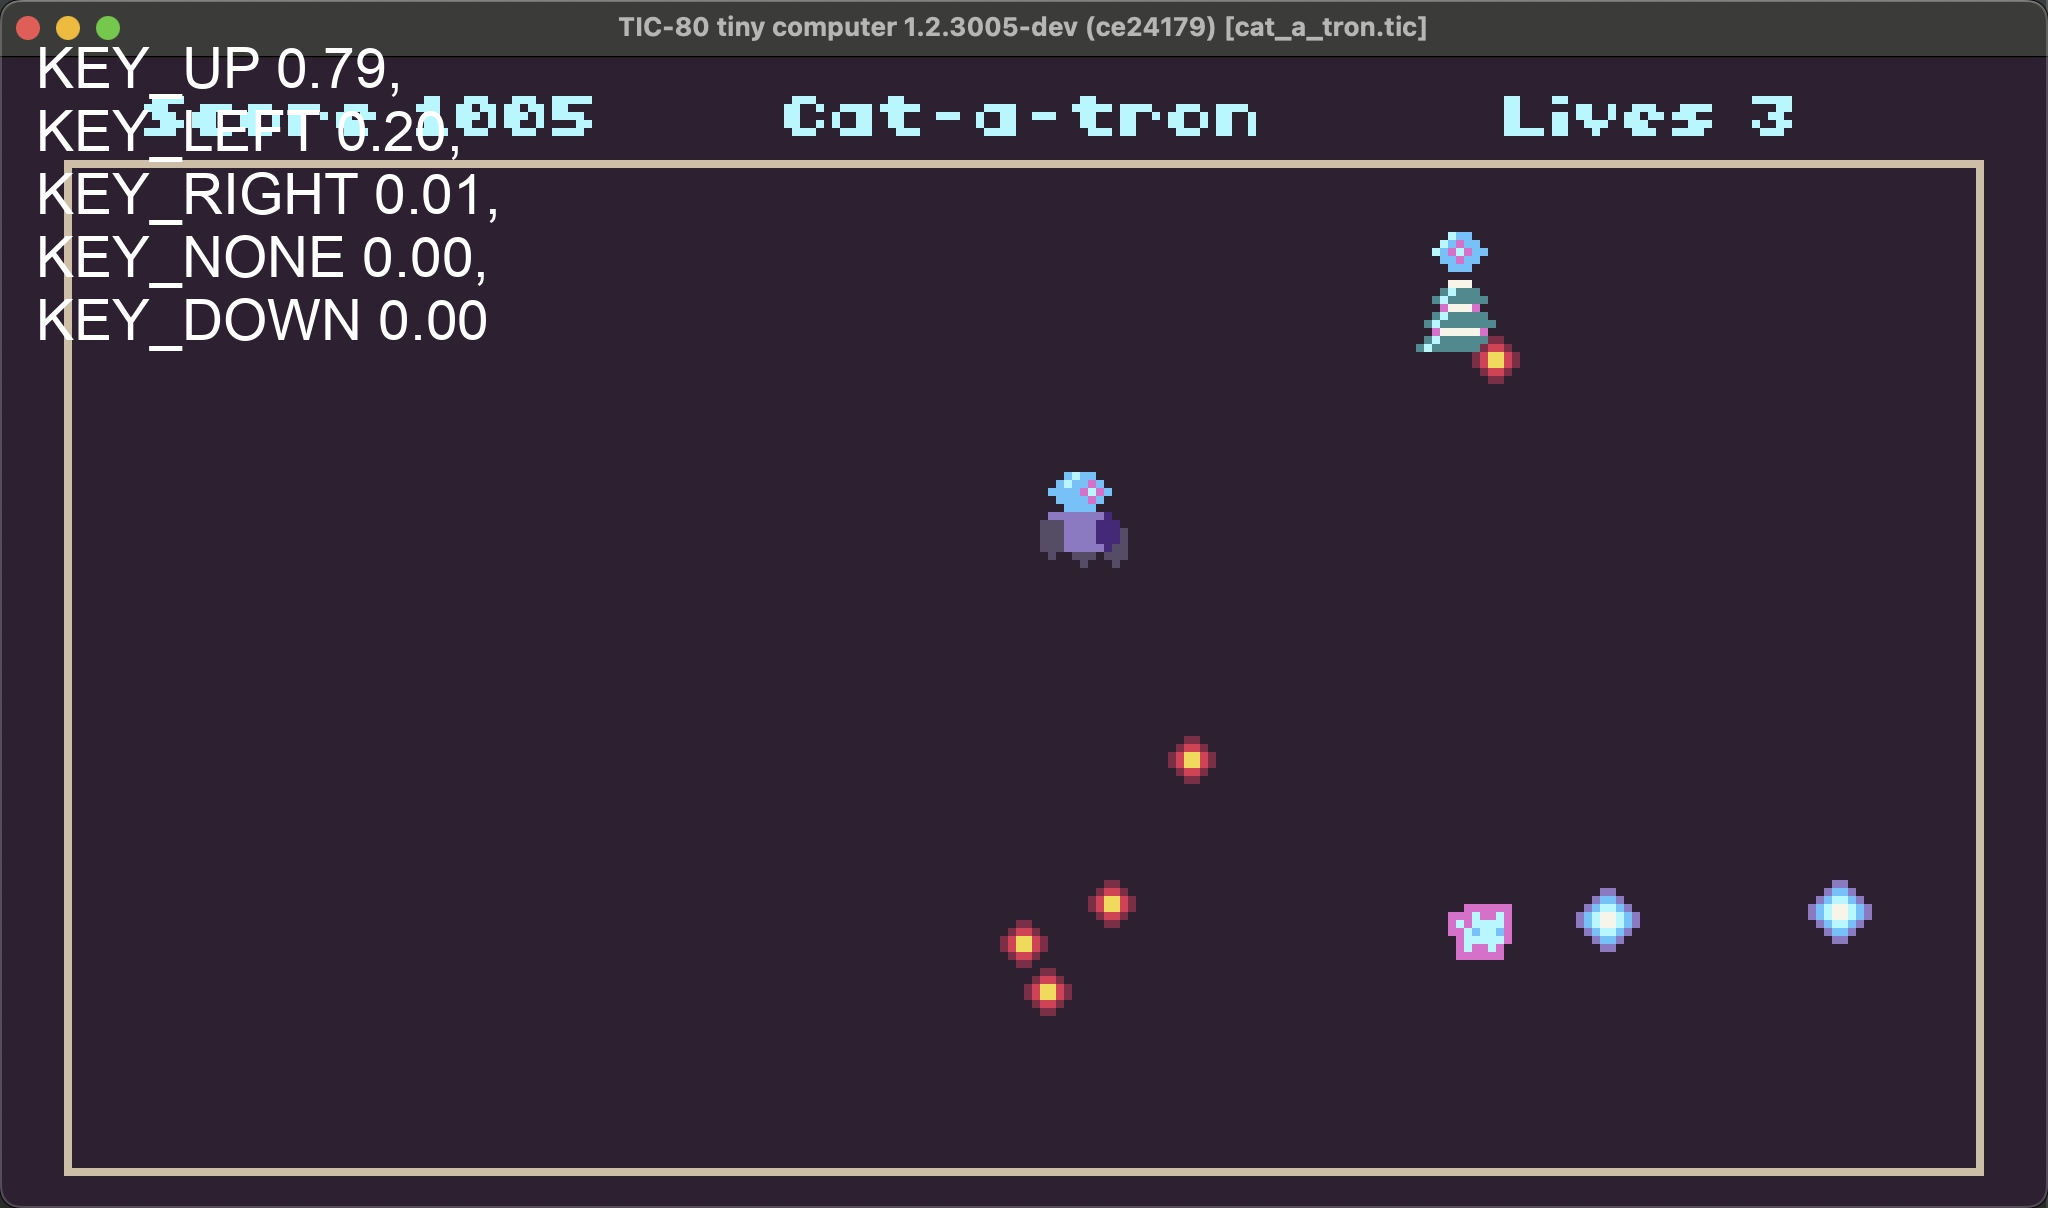

In [35]:
img = os.path.join('datasets', 'catclassificationset', 'test', 'KEY_UP','e9fd06c2-0ad5-11f0-9a5f-acde48001122.jpg')
results = classify_model(img)

results[0].show()

In [34]:
img = os.path.join('datasets', 'catclassificationset', 'test', 'KEY_UP','e9fd06c2-0ad5-11f0-9a5f-acde48001122.jpg')
results = classify_model(img)

classify_model.names

print(results[0].summary()[0]['name'])





image 1/1 /content/datasets/catclassificationset/test/KEY_UP/e9fd06c2-0ad5-11f0-9a5f-acde48001122.jpg: 224x224 KEY_UP 0.79, KEY_LEFT 0.20, KEY_RIGHT 0.01, KEY_NONE 0.00, KEY_DOWN 0.00, 7.8ms
Speed: 21.1ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
KEY_UP


# Попробуем Canny Images

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model

# Train the model
results = model.train(data="/content/datasets/catcanny", epochs=100)

100%|██████████| 5.52M/5.52M [00:00<00:00, 334MB/s]

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/datasets/catcanny, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/catcanny/train... 890 images, 0 corrupt: 100%|██████████| 890/890 [00:00<00:00, 3530.32it/s]

train: New cache created: /content/datasets/catcanny/train.cache



val: Scanning /content/datasets/catcanny/test... 136 images, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 3249.66it/s]

val: New cache created: /content/datasets/catcanny/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.287G      1.944         16        224:  32%|███▏      | 18/56 [00:02<00:02, 13.39it/s]

      1/100     0.291G      1.849         16        224:  64%|██████▍   | 36/56 [00:03<00:01, 13.45it/s]
100%|██████████| 755k/755k [00:00<00:00, 116MB/s]
      1/100     0.291G      1.754         10        224: 100%|██████████| 56/56 [00:05<00:00,  9.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 16.34it/s]

                   all      0.331      0.985



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.299G      1.442         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 32.60it/s]


                   all      0.353      0.993

      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.307G      1.452         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.43it/s]

                   all      0.309      0.993



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.316G      1.446         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.85it/s]

                   all      0.368      0.993



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.326G      1.457         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.76it/s]


                   all      0.353      0.993

      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.334G      1.417         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.92it/s]


                   all      0.404      0.993

      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.344G      1.387         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 42.81it/s]

                   all      0.353      0.993



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.352G      1.378         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.47it/s]

                   all      0.397      0.993



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.359G      1.373         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.85it/s]


                   all      0.404      0.993

      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.369G      1.337         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 51.23it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.377G      1.359         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.11it/s]

                   all      0.324      0.993



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.387G      1.336         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 47.79it/s]

                   all      0.346      0.993



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.395G       1.31         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.11it/s]


                   all       0.36      0.993

      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.404G      1.308         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.06it/s]

                   all      0.419      0.993



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.412G      1.322         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 66.03it/s]


                   all      0.338      0.993

      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.422G      1.251         10        224: 100%|██████████| 56/56 [00:05<00:00,  9.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.06it/s]

                   all      0.309      0.993



      Epoch    GPU_mem       loss  Instances       Size


     17/100      0.43G      1.241         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 61.93it/s]


                   all      0.426      0.993

      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.439G      1.236         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 36.43it/s]


                   all      0.338      0.993

      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.447G       1.26         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 62.33it/s]


                   all      0.331      0.993

      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.457G      1.219         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 48.59it/s]

                   all       0.36      0.993



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.465G      1.246         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.14it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.475G      1.199         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.32it/s]


                   all       0.36      0.993

      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.482G       1.25         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 47.31it/s]

                   all      0.353      0.993



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.492G      1.195         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.74it/s]

                   all      0.419      0.993



      Epoch    GPU_mem       loss  Instances       Size


     25/100       0.5G      1.172         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.17it/s]

                   all      0.404      0.993



      Epoch    GPU_mem       loss  Instances       Size


     26/100      0.51G      1.197         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.19it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.518G      1.216         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 34.13it/s]

                   all      0.412      0.993



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.525G      1.202         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.66it/s]


                   all      0.382      0.993

      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.535G       1.15         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.43it/s]


                   all      0.375      0.993

      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.543G      1.106         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 52.90it/s]

                   all      0.397      0.993



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.553G      1.132         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.63it/s]

                   all      0.368      0.993



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.561G      1.141         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.64it/s]


                   all       0.36      0.993

      Epoch    GPU_mem       loss  Instances       Size


     33/100      0.57G      1.084         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.24it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.578G      1.067         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.92it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.588G        1.1         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 68.61it/s]

                   all      0.346      0.993



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.596G      1.046         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 40.53it/s]

                   all      0.346      0.993



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.605G      1.074         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 51.57it/s]

                   all      0.434      0.993



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.613G      1.015         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.13it/s]


                   all      0.353      0.985

      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.623G      1.076         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 61.05it/s]


                   all       0.36      0.993

      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.631G     0.9769         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.00it/s]


                   all      0.353      0.993

      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.641G     0.9735         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 47.14it/s]

                   all      0.412      0.993



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.648G          1         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.58it/s]

                   all      0.368      0.993



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.658G     0.9906         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.45it/s]

                   all      0.397      0.993



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.666G     0.9648         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.87it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.676G     0.8874         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 61.09it/s]


                   all       0.39      0.993

      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.684G     0.9444         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 65.44it/s]

                   all      0.353      0.993



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.691G     0.9116         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 37.07it/s]


                   all      0.346      0.993

      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.701G      0.894         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.49it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.711G     0.9057         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 33.45it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.719G     0.9096         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.65it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.727G     0.8575         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.72it/s]

                   all      0.368      0.993



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.736G     0.8527         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.19it/s]


                   all      0.404      0.993

      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.744G     0.8458         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.27it/s]

                   all      0.382      0.993



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.754G     0.8611         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 36.84it/s]


                   all      0.404      0.985

      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.762G      0.836         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 37.28it/s]

                   all      0.346      0.985



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.771G     0.7949         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.44it/s]


                   all      0.375      0.993

      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.779G     0.7734         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 49.08it/s]

                   all      0.375      0.978



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.789G      0.752         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 34.94it/s]

                   all      0.368      0.985



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.797G     0.7965         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 37.26it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.807G     0.7507         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 62.84it/s]

                   all      0.338      0.985



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.814G     0.7741         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.20it/s]


                   all      0.404      0.993

      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.824G     0.7249         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.68it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.832G     0.7382         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.71it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     64/100      0.84G     0.7027         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 42.81it/s]

                   all      0.346      0.993



      Epoch    GPU_mem       loss  Instances       Size


     65/100      0.85G      0.752         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 55.53it/s]


                   all       0.39      0.993

      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.857G     0.6953         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 55.55it/s]


                   all      0.368      0.993

      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.867G       0.68         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.45it/s]

                   all      0.397      0.993



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.875G     0.6641         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.87it/s]

                   all      0.397      0.985



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.885G     0.6499         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 41.72it/s]

                   all      0.382      0.985



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.893G     0.7099         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.77it/s]

                   all      0.397      0.993



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.902G     0.6654         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 32.26it/s]

                   all      0.375      0.985



      Epoch    GPU_mem       loss  Instances       Size


     72/100      0.91G     0.6354         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 42.68it/s]

                   all      0.382      0.985



      Epoch    GPU_mem       loss  Instances       Size


     73/100      0.92G     0.6432         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 53.07it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.928G     0.6326         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 61.76it/s]

                   all      0.375      0.993



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.938G     0.6155         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 46.78it/s]

                   all       0.39      0.993



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.945G     0.6501         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.48it/s]


                   all      0.368      0.985

      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.955G     0.5466         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.41it/s]

                   all      0.382      0.985



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.963G     0.6296         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.42it/s]

                   all       0.36      0.985



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.973G     0.6006         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 62.79it/s]

                   all      0.382      0.985



      Epoch    GPU_mem       loss  Instances       Size


     80/100      0.98G     0.5503         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.43it/s]


                   all      0.375      0.985

      Epoch    GPU_mem       loss  Instances       Size


     81/100      0.99G     0.5597         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 40.27it/s]

                   all      0.368      0.985



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.998G     0.6195         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.17it/s]


                   all      0.412      0.985

      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.01G     0.5799         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 40.99it/s]

                   all      0.368      0.985



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.02G     0.5304         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 46.74it/s]

                   all      0.338      0.985



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.02G     0.5385         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.65it/s]


                   all      0.368      0.985

      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.03G     0.5379         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 38.03it/s]


                   all      0.382      0.985

      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.04G     0.5047         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.62it/s]

                   all      0.397      0.985



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.05G      0.519         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 50.79it/s]

                   all      0.353      0.985



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.06G     0.5015         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 54.00it/s]

                   all      0.404      0.985



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.07G      0.533         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 39.52it/s]


                   all      0.368      0.985

      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.08G     0.5107         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 57.79it/s]

                   all      0.368      0.985



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.09G     0.5607         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 56.27it/s]


                   all      0.382      0.985

      Epoch    GPU_mem       loss  Instances       Size


     93/100      1.09G     0.5189         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.38it/s]


                   all      0.368      0.985

      Epoch    GPU_mem       loss  Instances       Size


     94/100       1.1G     0.5084         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 58.92it/s]

                   all      0.375      0.985



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.11G     0.5279         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 46.65it/s]

                   all       0.39      0.985



      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.12G     0.4857         10        224: 100%|██████████| 56/56 [00:05<00:00, 11.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 44.49it/s]

                   all      0.412      0.985



      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.13G     0.4958         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.30it/s]

                   all      0.404      0.985



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.14G     0.4723         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 32.71it/s]

                   all      0.426      0.985



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.15G     0.4971         10        224: 100%|██████████| 56/56 [00:04<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 60.19it/s]

                   all      0.434      0.985



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.16G     0.4498         10        224: 100%|██████████| 56/56 [00:05<00:00, 10.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 59.21it/s]


                   all      0.441      0.985

100 epochs completed in 0.158 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n-cls summary (fused): 47 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/catcanny/train... found 890 images in 6 classes: ERROR ❌️ requires 7 classes, not 6
val: /content/datasets/catcanny/test... found 136 images in 6 classes: ERROR ❌️ requires 7 classes, not 6
test: /content/datasets/catcanny/test... found 136 images in 6 classes: ERROR ❌️ requires 7 classes, not 6


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 19.10it/s]


                   all      0.441      0.985
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [8]:
canny_model = YOLO("/content/runs/classify/train/weights/best.pt")

In [9]:
canny_model.save("kirkir_canny_best.pt")

In [10]:
canny_model.export(format="openvino")

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-cls summary (fused): 47 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 7) (3.1 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0,!=2025.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 180.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.0s, installed 1 package: ['openvino>=2024.0.0,!=2025.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 6.8s, saved as '/content/runs/classify/train/weights/best_openvino_model/' (6.0 MB)

Export complete (8.4s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=

'/content/runs/classify/train/weights/best_openvino_model'